# Modeling

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


pd.set_option("display.max_columns", 200) 

## Load data

In [61]:
# training and test data containing NaN values
train_df = pd.read_csv('train_complete.csv')
test_df = pd.read_csv('test_complete.csv')

In [35]:
# Datasets with the mean imputed for missing values
train_df_mean = pd.read_csv('train_df_mean.csv')
test_df_mean = pd.read_csv('test_df_mean.csv')

In [59]:
# Datasets with the zeros imputed for missing values
train_df_zero = pd.read_csv('train_df_zero.csv')
test_df_zero = pd.read_csv('test_df_zero.csv')

In [3]:
# Datasets with IterativeImputer linear regression for missing values
train_df_it_imp = pd.read_csv('train_df_it_imp.csv')
test_df_it_imp = pd.read_csv('test_df_it_imp.csv')

In [28]:
train_df_it_imp.head()

,Year,Incidence,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_(TSP)_STP_l2,Arithmetic_Mean_min_Lead_(TSP)_STP_l2,Arithmetic_Mean_max_Lead_(TSP)_STP_l2,Arithmetic_Mean_mean_Lead_(TSP)_STP_l5,Arithmetic_Mean_min_Lead_(TSP)_STP_l5,Arithmetic_Mean_max_Lead_(TSP)_STP_l5,Arithmetic_Mean_mean_Lead_(TSP)_STP_l8,Arithmetic_Mean_min_Lead_(TSP)_STP_l8,Arithmetic_Mean_max_Lead_(TSP)_STP_l8,Arithmetic_Mean_mean_Arsenic_PM2.5_LC,Arithmetic_Mean_mean_Chromium_PM2.5_LC,Arithmetic_Mean_mean_Lead_PM2.5_LC,Arithmetic_Mean_mean_Manganese_PM2.5_LC,Arithmetic_Mean_mean_Nickel_PM2.5_LC,Arithmetic_Mean_min_Arsenic_PM2.5_LC,Arithmetic_Mean_min_Chromium_PM2.5_LC,Arithmetic_Mean_min_Lead_PM2.5_LC,Arithmetic_Mean_min_Manganese_PM2.5_LC,Arithmetic_Mean_min_Nickel_PM2.5_LC,Arithmetic_Mean_max_Arsenic_PM2.5_LC,Arithmetic_Mean_max_Chromium_PM2.5_LC,Arithmetic_Mean_max_Lead_PM2.5_LC,Arithmetic_Mean_max_Manganese_PM2.5_LC,Arithmetic_Mean_max_Nickel_PM2.5_LC,X1st_Max_Value_mean_Arsenic_PM2.5_LC,X1st_Max_Value_mean_Chromium_PM2.5_LC,X1st_Max_Value_mean_Lead_PM2.5_LC,X1st_Max_Value_mean_Manganese_PM2.5_LC,X1st_Max_Value_mean_Nickel_PM2.5_LC,X1st_Max_Value_min_Arsenic_PM2.5_LC,X1st_Max_Value_min_Chromium_PM2.5_LC,X1st_Max_Value_min_Lead_PM2.5_LC,X1st_Max_Value_min_Manganese_PM2.5_LC,X1st_Max_Value_min_Nickel_PM2.5_LC,X1st_Max_Value_max_Arsenic_PM2.5_LC,X1st_Max_Value_max_Chromium_PM2.5_LC,X1st_Max_Value_max_Lead_PM2.5_LC,X1st_Max_Value_max_Manganese_PM2.5_LC,X1st_Max_Value_max_Nickel_PM2.5_LC,Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l2,Arithmetic_Mean_mean_Chromium_PM2.5_LC_l2,Arithmetic_Mean_mean_Lead_PM2.5_LC_l2,Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l5,Arithmetic_Mean_mean_Chromium_PM2.5_LC_l5,Arithmetic_Mean_mean_Lead_PM2.5_LC_l5,Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l8,Arithmetic_Mean_mean_Chromium_PM2.5_LC_l8,Arithmetic_Mean_mean_Lead_PM2.5_LC_l8,Arithmetic_Mean_mean_Nitric_oxide_(NO),Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_min_Nitric_oxide_(NO),Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_max_Nitric_oxide_(NO),Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx),X1st_Max_Value_mean_Nitric_oxide_(NO),X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx),X1st_Max_Value_min_Nitric_oxide_(NO),X1st_Max_Value_min_Oxides_of_nitrogen_(NOx),X1st_Max_Value_max_Nitric_oxide_(NO),X1st_Max_Value_max_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_mean_Nitric_oxide_(NO)_l2,Arithmetic_Mean_mean_Nitric_oxide_(NO)_l5,Arithmetic_Mean_mean_Nitric_oxide_(NO)_l8,Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx)_l2,Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx)_l5,Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx)_l8,Arithmetic_Mean_min_Nitric_oxide_(NO)_l2,Arithmetic_Mean_min_Nitric_oxide_(NO)_l5,Arithmetic_Mean_min_Nitric_oxide_(NO)_l8,Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx)_l2,Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx)_l5,Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx)_l8,Arithmetic_Mean_max_Nitric_oxide_(NO)_l2,Arithmetic_Mean_max_Nitric_oxide_(NO)_l5,Arithmetic_Mean_max_Nitric_oxide_(NO)_l8,Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx)_l2,Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx)_l5,Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx)_l8,X1st_Max_Value_mean_Nitric_oxide_(NO)_l2,X1st_Max_Value_mean_Nitric_oxide_(NO)_l5,X1st_Max_Value_mean_Nitric_oxide_(NO)_l8,X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx)_l2,X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx)_l5,X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx)_l8,X1st_Max_Value_min_Nitric_oxide_(NO)_l2,X1st_Max_Value_min_Nitric_oxide_(NO)_l5,X1st_Max_Value_min_Nitric_oxide_(NO)_l8,X1st_Max_Value_min_Oxides_of_nitrogen_(NOx)_l2,X1st_Max_Value_min_Oxides_of_nitrogen_(NOx)_l5,X1st_Max_Value_min_Oxides_of_nitrogen_(NOx)_l8,X1st_Max_Value_max_Nitric_oxide_(NO)_l2,X1st_Max_Value_max_Nitric_oxide_(NO)_l5,X1st_Max_Value_max_Nitric_oxide_(NO)_l8,X1st_Max_Value_max_Oxides_of_nitrogen_(NOx)_l2,X1st_Max_Value_max_Oxides_of_nitrogen_(NOx)_l5,X1st_Max_Value_max_Oxides_

## Prepare data for modeling

In [ ]:
# Splitting data for data containing imputed means before pipeline
X = train_df_mean[test_df_mean.columns].drop(columns='ID', axis = 1)
y = train_df_mean['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

num_columns = make_column_selector(dtype_include=np.number)
cat_columns = make_column_selector(dtype_exclude=np.number)

In [ ]:
# Splitting data for data containing imputed 0 before pipeline
X_2 = train_df_zero[test_df_zero.columns].drop(columns='ID', axis = 1)
y_2 = train_df_zero['Incidence']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42)

num_columns_2 = make_column_selector(dtype_include=np.number)
cat_columns_2 = make_column_selector(dtype_exclude=np.number)

In [68]:
# Splitting data for data containing NaNs in columns
X_3 = train_df[test_df_zero.columns].drop(columns='ID', axis = 1)
y_3 = train_df['Incidence']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42)

num_columns_3 = make_column_selector(dtype_include=np.number)
cat_columns_3 = make_column_selector(dtype_exclude=np.number)

In [21]:
# Splitting data for data containing NaNs in columns
X_3 = train_df[test_df_zero.columns].drop(columns='ID', axis = 1)
y_3 = train_df['Incidence']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42)

num_columns_3 = make_column_selector(dtype_include=np.number)
cat_columns_3 = make_column_selector(dtype_exclude=np.number)

In [30]:
# Splitting data for data with NaNs imputed with IterativeImputer
X_4 = train_df_it_imp[test_df_it_imp.columns].drop(columns=['ID', 'State_Name', 'Age'], axis = 1)
y_4 = train_df_it_imp['Incidence']
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=42)

num_columns_4 = make_column_selector(dtype_include=np.number)
cat_columns_4 = make_column_selector(dtype_exclude=np.number)

In [94]:
# Instantiating function that will be used to calculate model evaluation metrics.

def evaluation(X_test, y_test, preds, model):
    R2 = r2_score(y_test, preds)
    #MSE = mean_squared_error(y_test, preds)
    RMSE = np.sqrt(mean_squared_error(y_test, preds))
    #MAE = mean_absolute_error(y_test, preds)

    print(f'R2: {R2}')
    #print(f'MSE: {MSE}')
    print(f'RMSE: {RMSE}')
    #print(f'MAE: {MAE}')

    return {
        'R2': R2,
        #'MSE': MSE,
        'RMSE': RMSE,
        #'MAE': MAE
    }

## Set up various pipes with preprocessing steps and estimator method

In [6]:
numeric_preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())
])

In [7]:
numeric_preprocessor_2 = Pipeline(steps=[
    ("imputer", IterativeImputer(estimator=LinearRegression(), max_iter=500)),
    ("scaler", StandardScaler())
])


In [8]:
categorical_preprocessor = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [12]:
preprocessor = ColumnTransformer(transformers = [
    ("categorical", categorical_preprocessor, cat_columns_4),
    ("numerical", numeric_preprocessor, num_columns_4)
])

In [72]:
lasso_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lasso", Lasso())
])

In [79]:
# Preprocessor includes IterativeImputer
lasso_pipe_2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lasso", Lasso(max_iter=5000))
])

In [15]:
knn_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsRegressor())
])

In [23]:
rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor())
])

In [45]:
rf_pipe2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor())
])

In [73]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A818E0>),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A81FD0>)])),
                ('lasso', Lasso())])

In [ ]:
lasso_pipe.predict

In [80]:
lasso_pipe_2.fit(X_train_3, y_train_3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000163DD6ADE20>),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=LinearRegression(),
                                                                                    max_iter=500)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000163DD695220>)])),
                ('lasso', Lasso(max_iter=5000))])

In [84]:
lasso_pipe_2.score(X_train_3, y_train_3), lasso_pipe_2.score(X_test_3, y_test_3)

(0.8611795414535867, 0.8494640476404346)

In [31]:
knn_pipe.fit(X_train_4, y_train_4)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A818E0>),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A81FD0>)])),
                ('knn', KNeighborsRegressor())])

In [33]:
knn_pipe.score(X_train_4, y_train_4), knn_pipe.score(X_test_4, y_test_4)

(0.8687544798552432, 0.7760413056177102)

In [66]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A818E0>),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A81FD0>)])),
                ('rf', RandomForestRegressor())])

In [96]:
rf_pipe2.fit(X_train_4, y_train_4)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A818E0>),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A81FD0>)])),
                ('rf', RandomForestRegressor())])

In [67]:
rf_pipe.score(X_train, y_train), rf_pipe.score(X_test, y_test)

(0.9974478976825207, 0.9807017428142318)

In [69]:
rf_preds = rf_pipe.predict(X_test)

In [70]:
evaluation(X_test, y_test, rf_preds, rf_pipe)

R2: 0.9807017428142318
RMSE: 213.52353003012118


{'R2': 0.9807017428142318, 'RMSE': 213.52353003012118}

In [ ]:
evaluation(X_test_4, y_test_4, rf_preds, rf_pipe)

In [97]:
# pipe with iterative imputer data and random forest classifier. 
rf_pipe2.score(X_train_4, y_train_4), rf_pipe2.score(X_test_4, y_test_4)

(0.9730496540102977, 0.9084382213949193)

In [63]:
rf_preds2 = rf_pipe2.predict(X_test_4)

In [62]:
evaluation(X_test_4, y_test_4, rf_preds, rf_pipe)

R2: 0.9083888912809961
RMSE: 465.2225584914289


{'R2': 0.9083888912809961, 'RMSE': 465.2225584914289}

In [ ]:
rf_pipe.score(X_train_4, y_train_4), rf_pipe2.score(X_test_4, y_test_4)

## Hyperparameter tuning

In [75]:
lasso_params = {
    'lasso__alpha' : [0.75, 1, 1.2],
    'lasso__max_iter' : [80000],
    'lasso__alpha' : [ 1],
    'lasso__tol' : [ 0.0001, 0.00001]
}
lasso_gs = GridSearchCV(lasso_pipe, # what object are we optimizing?
                  lasso_params, # what parameters values are we searching?
                  cv = 3, # 3-fold cross-validation.
                  verbose = 1)

lasso_gs_2 = GridSearchCV(lasso_pipe, 
                  lasso_params,
                  cv = 3, 
                  verbose = 1)

lasso_gs_3 = GridSearchCV(lasso_pipe, 
                  lasso_params, 
                  cv = 3, 
                  verbose = 1)


In [77]:
lasso_gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A818E0>),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001E937A81FD0>)])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [1], 'lasso__max_iter': [80000],
                         'lasso__tol': [0.0001, 1e-05]},
             verbose=1)

In [ ]:
lass0_gs2 = lasso_gs.fit(X_train_, y_train)

In [52]:
lasso_gs.best_params_

{'lasso__alpha': 1, 'lasso__max_iter': 100000, 'lasso__tol': 0.0001}

In [78]:
# the data used to fit and test has the mean value for the column imputed for NaN
lasso_gs.score(X_train, y_train), lasso_gs.score(X_test, y_test)

(0.8655765383275731, 0.8528402820970804)

In [80]:
lasso_preds = lasso_gs.predict(X_test)

In [81]:
evaluation(X_test, y_test, lasso_preds, lasso_gs)

R2: 0.8528402820970804
RMSE: 589.6321682698675


{'R2': 0.8528402820970804, 'RMSE': 589.6321682698675}

In [83]:
lasso_gs_it_imp = lasso_gs.fit(X_train_4, y_train_4)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [85]:
lasso_gs_it_imp.score(X_train_4, y_train_4), lasso_gs_it_imp.score(X_test_4, y_test_4)

(0.7731547684241956, 0.7492827622823528)

In [87]:
lasso_gs_it_preds = lasso_gs_it_imp.predict(X_test_4)

In [88]:
evaluation(X_test_4, y_test_4, lasso_gs_it_preds, lasso_gs_it_imp)

R2: 0.7492827622823528
RMSE: 769.6243377867311


{'R2': 0.7492827622823528, 'RMSE': 769.6243377867311}

In [51]:
# the data used to fit and test has 0s imputed for NaN
lasso_gs_2.score(X_train_2, y_train_2), lasso_gs_2.score(X_test_2, y_test_2)

(0.8623217490782447, 0.8492659568590457)

In [122]:
lasso_preds = lasso_gs.best_estimator_.predict(test_df_mean)

In [40]:
rf_preds = rf_pipe.predict(test_df_mean)

In [123]:
lasso_preds = pd.Series(lasso_preds)
type(lasso_preds)

pandas.core.series.Series

In [41]:
rf_preds = pd.Series(rf_preds)
type(rf_preds)

pandas.core.series.Series

In [42]:
preds_df = test_df_mean['ID']
type(preds_df)

pandas.core.series.Series

In [127]:
comp_df = pd.DataFrame({'ID': test_df_mean['ID'], 'Incidence': lasso_preds})

In [128]:
comp_df.to_csv('lasso_preds.csv', index=False)

In [43]:
comp_df_rf = pd.DataFrame({'ID': test_df_mean['ID'], 'Incidence': rf_preds})

In [44]:
comp_df_rf.to_csv('rf_preds.csv', index=False)

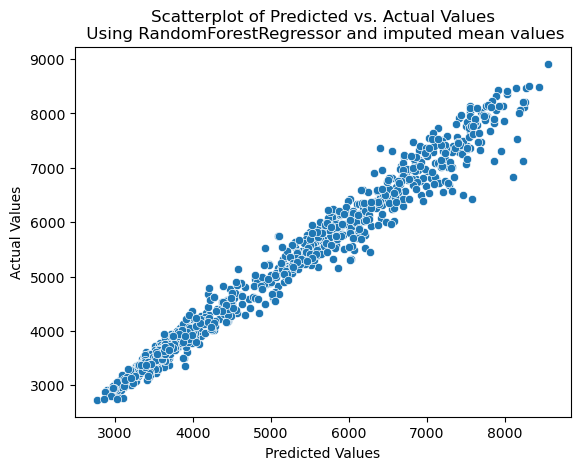

In [93]:
sns.scatterplot(y=y_test, x=rf_preds)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.title("Scatterplot of Predicted vs. Actual Values\n Using RandomForestRegressor and imputed mean values");